In [6]:
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots


import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

In [7]:
#from xgboost import XGBRegressor, XGBRFRegressor
#from catboost import CatBoostRegressor
#import catboost
#import plotly.express as px
#import plotly.graph_objects as go

#from scipy.stats.mstats import winsorize

#from pyod.models.feature_bagging import FeatureBagging
#from pyod.models.lof import LOF

In [8]:
#CSV to Load
rental_data= ("Resources/CFMR_df.csv")
rental_data_df=pd.read_csv(rental_data)
rental_data_df = rental_data_df.drop(['Unnamed: 0'], axis=1)
rental_data_df.head(300)

,State,Year,Studio,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Population,Percent Change
0,AK,2021,850.97,951.28,1200.14,1582.72,1815.38,25467.93,NaN
1,AL,2021,548.28,591.99,725.82,949.51,1094.63,72399.63,NaN
2,AR,2021,515.95,553.85,697.31,920.29,1065.15,39706.00,NaN
3,AS,2021,590.00,594.00,783.00,1121.00,1201.00,55519.00,NaN
4,AZ,2021,698.13,767.93,970.13,1340.20,1493.53,453995.67,NaN
...,...,...,...,...,...,...,...,...,...
275,VT,2022,785.91,869.83,1077.28,1387.28,1530.50,2449.48,NaN
276,WA,2022,794.72,899.13,1124.38,1563.41,1848.69,183845.77,NaN
277,WI,2022,597.74,667.40,853.43,1116.50,1242.57,80044.65,NaN
278,WV,2022,584.65,620.40,761.05,1003.47,1144.07,33397.00,NaN


In [9]:
rental_data_df.columns

Index(['State', 'Year', 'Studio', 'One Bedroom', 'Two Bedroom',
       'Three Bedroom', 'Four Bedroom', 'Population', 'Percent Change'],
      dtype='object')

In [10]:
rental_state_df = rental_data_df.sort_values(by=['State', 'Year'])

In [11]:
rental_state_df.head(10)

,State,Year,Studio,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Population,Percent Change
168,AK,2018,842.86,948.86,1183.59,1575.90,1848.17,24490.72,-0.01
112,AK,2019,863.97,977.31,1221.38,1623.93,1866.03,24490.72,0.03
56,AK,2020,902.24,1022.24,1276.03,1696.00,1926.31,25467.93,0.04
0,AK,2021,850.97,951.28,1200.14,1582.72,1815.38,25467.93,NaN
224,AK,2022,864.45,962.66,1236.45,1619.83,1890.34,25467.93,NaN
169,AL,2018,519.12,554.07,682.06,911.72,1050.61,71339.34,-0.01
113,AL,2019,530.30,569.61,697.54,925.31,1068.13,71339.34,0.02
57,AL,2020,533.90,575.87,700.64,924.25,1064.90,72399.63,0.00
1,AL,2021,548.28,591.99,725.82,949.51,1094.63,72399.63,NaN
225,AL,2022,586.07,627.84,773.81,1004.81,1154.52,72399.63,NaN


In [13]:
rental_state_df['mean'] = rental_state_df[["Studio", "One Bedroom", "Two Bedroom", "Three Bedroom", "Four Bedroom"]].mean(axis=1)

In [14]:
rental_state_df.head(10)

,State,Year,Studio,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Population,Percent Change,mean
168,AK,2018,842.86,948.86,1183.59,1575.90,1848.17,24490.72,-0.01,1279.876
112,AK,2019,863.97,977.31,1221.38,1623.93,1866.03,24490.72,0.03,1310.524
56,AK,2020,902.24,1022.24,1276.03,1696.00,1926.31,25467.93,0.04,1364.564
0,AK,2021,850.97,951.28,1200.14,1582.72,1815.38,25467.93,NaN,1280.098
224,AK,2022,864.45,962.66,1236.45,1619.83,1890.34,25467.93,NaN,1314.746
169,AL,2018,519.12,554.07,682.06,911.72,1050.61,71339.34,-0.01,743.516
113,AL,2019,530.30,569.61,697.54,925.31,1068.13,71339.34,0.02,758.178
57,AL,2020,533.90,575.87,700.64,924.25,1064.90,72399.63,0.00,759.912
1,AL,2021,548.28,591.99,725.82,949.51,1094.63,72399.63,NaN,782.046
225,AL,2022,586.07,627.84,773.81,1004.81,1154.52,72399.63,NaN,829.410


In [15]:
#Completed, Commited out to not be overwritten by accident
#rental_state_df.to_csv('ML3.csv')

In [22]:
#Filled all NaNs with accurate % changes via Excel, back with completed dataset
#CSV to Load
rental_data1= ("Resources/ML3.csv")
rental_data1_df=pd.read_csv(rental_data1)
rental_data1_df = rental_data1_df.drop(['Unnamed: 0'], axis=1)
rental_data1_df.head(300)

,State,Year,Studio,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Population,Percent Change
0,AK,2018,842.86,948.86,1183.59,1575.90,1848.17,24490.72,-0.01
1,AK,2019,863.97,977.31,1221.38,1623.93,1866.03,24490.72,0.03
2,AK,2020,902.24,1022.24,1276.03,1696.00,1926.31,25467.93,0.04
3,AK,2021,850.97,951.28,1200.14,1582.72,1815.38,25467.93,0.00
4,AK,2022,864.45,962.66,1236.45,1619.83,1890.34,25467.93,0.00
...,...,...,...,...,...,...,...,...,...
275,WY,2018,577.57,638.48,813.74,1096.74,1328.70,24505.48,0.06
276,WY,2019,591.70,650.91,825.35,1109.83,1375.43,24505.48,0.02
277,WY,2020,621.39,678.83,845.61,1138.26,1422.96,25356.52,0.02
278,WY,2021,640.09,676.70,842.09,1138.87,1412.91,25356.52,0.00


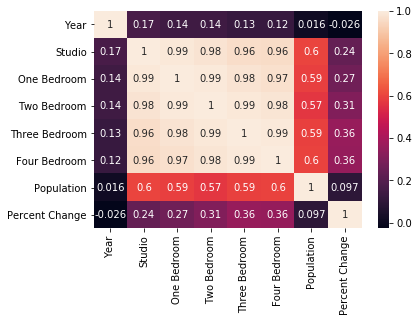

In [23]:
sns.heatmap(rental_data_df.corr(), annot=True)

In [ ]:
X = USAhousing[['Year', 'Avg. Area House Age']]
y = USAhousing['Studio']

In [8]:
X = rental_data_df[['Studio']]
Y = rental_data_df['Population']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.3620817833909957

In [ ]:
y_data = CFMR22_df['Studio']

x_data=CFMR22_df.drop('Studio',axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()

lre.fit(x_train[['Population']], y_train)
lre.score(x_test[['Population']], y_test)